
<h1><center> Assignment 4</center></h1>
<h2><center>Cole Dixon


# Theory
### Problem 1

In [35]:
# this is not real code that can be run - it is 'pseudocode' but in a code cell to help with formatting
#### Part a

def child(k,i):
    return d*i + k

def parent(i):
    return i - (d-1)//d

#### Part b

def maxheapify(A,i):
    c = child(1,i)
    if c < A.size and A[c] > A[i]:
        largest = c
    else:
        largest = i
    for j in [2,d]:
        c = child(j,i)
        if c < A.size and A[c] > A[i]:
            largest = c
    if largest != i:
        swap(A[i],A[largest])
        maxheapify(A,largest)

The height of the tree can now be described by $h=log_d n$. So the maxheapify function will at worst have to go down h levels for a balanced tree. As we saw for the binary heap, even if the tree is not balanced this is still the case on average. However, now at every level there is an O(d) operation of finding the largest element among the d children. This means that the overall runtime is $O(dlog_d n)$.

#### Part c

For d = 2, the average runtime is $O(log_2(n))$. The d-ary heap is not necessarily better, but it can be. Having more children nodes means that the height of the tree is lower, and certain operations runtimes will be reduced. However with a large value of d then this benefit may be negated by the O(d) operation needed to find the largest child.

### Problem 2

#### part a

\begin{align*}
    E(x) &= \sum_{i=0}^{\infty} i*P(x=i)\\
    E(x) &= \sum_{i=1}^{\infty} i*(P(x\geq i)-P(x\geq i+1))\\
    E(x) &= \sum_{i=1}^{\infty} i*P(x\geq i) - i*P(x\geq i+1)\\
    E(x) &= 1*P(x\geq 1) - 1*P(x\geq 2) + 2*P(x\geq 2) - 2*P(x\geq 3) + ... + n*P(x\geq n) - n*P(x\geq n+1)\\
    E(x) &= P(x\geq 1) + P(x\geq 2) + P(x\geq 3)+ ...\\
    E(x) &= \sum_{i=1}^{\infty} P(x\geq i)\\
\end{align*}

#### part b

$P(X\geq i) = \cap_{j=1}^{i-1} P(A_i)$

because the probability that the number of probes is greater than i is equal to the chance that all previous probes occured and were occupied.

#### part c

Using the multiplication rule for probabilities we can say that $\cap_{j=1}^{i-1} P(A_j) = \prod_{j=1}^{i-1} P(A_j) = \prod_{j=1}^{i-1} \frac{n-(j-1)}{m}$

This is similar to sampling without replacement.

We can say that $\prod_{j=1}^{i-1} \frac{n-(j-1)}{m} \leq (\frac{n}{m})^{i-1} = \alpha ^{i-1}$

#### part d

\begin{align*}
    E(X) &= \sum_{i=1}^{\infty} P(x\geq i)\\
    E(X) &= \sum_{i=1}^{\infty} \prod_{j=1}^{i-1} \frac{n-(j-1)}{m}\\
    E(X) &\leq \sum_{i=1}^{\infty} \alpha ^{i-1}\\
    E(X) &\leq \frac{1}{1-\alpha}
\end{align*}

This is using the rule for geometric series.

#### part e

Our load factor would have to be equal to $\frac{1}{2}$ in order for the expected value to be less or equal to 2. This means that we will have to continually expand our table in order to keep the load factor low, so that the table is efficient. It is possible with a load factor of 0. However, this implies that the table is empty, so that is not very useful. You can't do anything with an empty table.


## coding portion
#### Problem 3

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from time import perf_counter
import heapq


In [5]:
def left(i):
    return 2*i+1

def right(i):
    return 2*i+2

def parent(i):
    return (i-1)//2

def max_heapify(A,i=0,heap_size = -1):
    if heap_size == -1:
        heap_size = len(A)
    l, r = left(i),right(i)
    if l < heap_size and A[l] > A[i]:
        largest = l
    else: largest = i
    if r < heap_size and A[r] > A[largest]:
        largest = r
    if largest != i:
        A[i],A[largest] = A[largest],A[i]
        max_heapify(A,i = largest,heap_size=heap_size)

def build_max_heap(A):
    for i in range(0,(len(A)//2)):
        max_heapify(A,i = (len(A)//2)-1-i)
        
def is_max_heap(A):
    for i in range(1,len(A)):
        p = parent(i)
        if A[p] < A[i]:
            return False
    return True

def heapsort(A):
    build_max_heap(A)
    for i in range(0,len(A)-1):
        A[0] , A[len(A)-1-i] = A[len(A)-1-i], A[0]
        max_heapify(A,heap_size=len(A)-1-i)
    return A

def heapsort_python(A):
    heapq.heapify(A)
    return [heapq.heappop(A) for i in range(len(A))]

In [6]:
# helper functions

def is_sorted(A):
    for i in range(0,len(A)-2):
        if A[i] > A[i+1]:
            return False
    return True

def check_validity(func):
    rng = np.random.default_rng()
    for i in range(100,400,10):
        ints = rng.integers(0,1000,i)
        if not is_sorted(func(list(ints))):
            return False
    return True

def compare_worst(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Worst Runtimes comparison. Trials = " + str(trials))
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            worst_time = 0
            for i in range(0,trials):
                int_list = rng.integers(0,1000,size)

                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                if worst_time < (end-start): worst_time = (end-start)
            times.append(worst_time)
        
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

def compare_average(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Average Runtimes comparison. Trials = " + str(trials))
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            time = 0
            for i in range(0,trials):
                int_list = rng.integers(0,1000,size)

                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                time += (end-start)
            times.append(time/trials)
    
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

def make_sorta_sorted(n, mess_factor):
    rng = np.random.default_rng()
    A = sorted(rng.integers(1,1000,n))
    percent = int((mess_factor * n) // 2)
    for i in range(percent):
        j_1, j_2 = rng.integers(0,n,2)
        A[j_1], A[j_2] = A[j_2], A[j_1]
    return A

def compare_adaptive(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Best Runtimes comparison on partially sorted lists. Trials = " + str(trials))
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            best_time = 100
            for i in range(0,trials):
                int_list = make_sorta_sorted(size,0.1)
                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                if (end-start) < best_time: best_time = (end-start)
            times.append(best_time)
    
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()


In [7]:
#insertion sort for comparison
def insertionsort(A):
    for i in range(0,len(A)-1):
        if A[i] > A[i+1]:
            insert = i+1
            for j in range(0,i+1):
                if A[insert] < A[i-j]:
                    A[insert],A[i-j] = A[i-j],A[insert]
                    insert = i-j
    return A

#merge sort for comparison
def merge(left,right):
    merge_list = []
    left_index, right_index = 0, 0
    while(left_index < len(left) and right_index < len(right)):
        if left[left_index] > right[right_index]:
            merge_list.append(right[right_index])
            right_index+=1
        else:
            merge_list.append(left[left_index])
            left_index+=1
    if left_index == len(left):
        merge_list += right[right_index:]
    elif right_index == len(right):
        merge_list += left[left_index:]
    return merge_list

def mergesort(A):
    if len(A) == 1:
        return A
    mid = len(A)//2
    left = mergesort(A[0:mid])
    right = mergesort(A[mid:])
    return merge(left,right)

#quick sort for comparison
def partition(A,p,r):
    pivot = A[r]
    i = p-1
    for j in range(p,r):
        if A[j] <= pivot:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]
    return i+1

def quicksort(A,start = 0,stop = -1):
    if stop == -1:
        stop = len(A)-1
    if start < stop:
        q = partition(A,start,stop)
        quicksort(A,start,q-1)
        quicksort(A,q+1,stop)
    return A

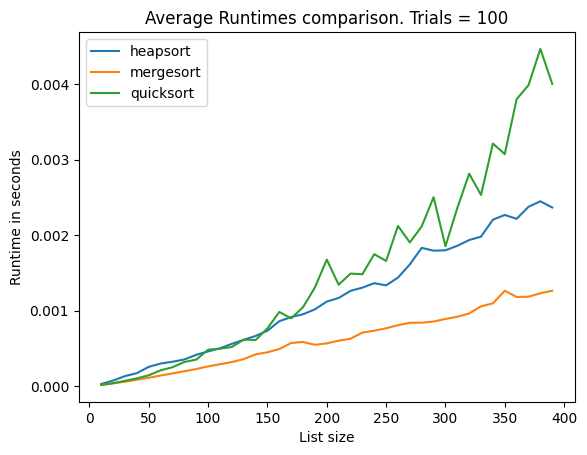

In [8]:
compare_average(heapsort,mergesort,quicksort)

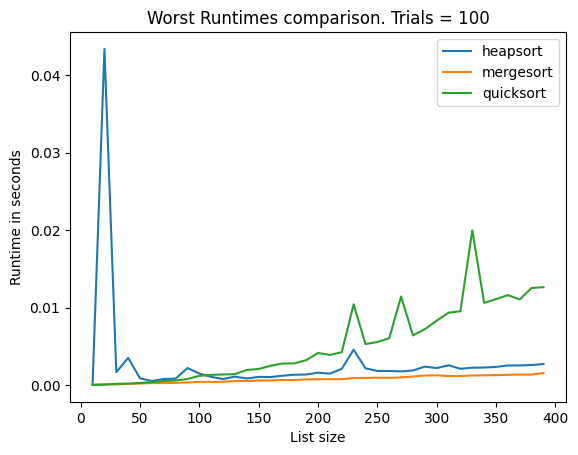

In [9]:
compare_worst(heapsort,mergesort,quicksort)

As expected heapsort does not perform quite as well as mergesort, but it is still comparable. (I know that quicksort should perform the best, but I still can't figure out why it isn't for me.)

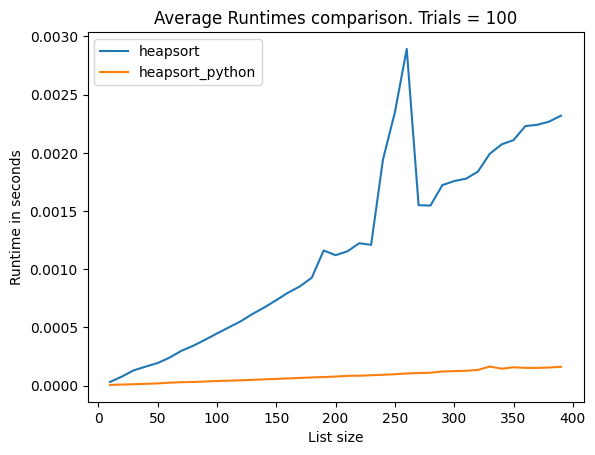

In [10]:
compare_average(heapsort,heapsort_python)

As expected, python's heapsort performed much much better. This could be because python's heapsort is made efficient at a very low level. If it were possible to unravel the recursion then that could make it much faster, as recursion is generally very slow.

### Problem 4

In [11]:
class PriorityQueue:
    def __init__(self):
        self.collection = []
        self.size = 0
        self.data_locations = {}
    def __right(self,i):
        return 2*i+1
    def __left(self,i):
        return 2*i+2
    def __parent(self,i):
        return (i-1)//2
    def __sift_down(self,i):
        l, r = self.__left(i),self.__right(i)
        if l < len(self.collection) and self.collection[l][1] > self.collection[i][1]:
            largest = l
        else: largest = i
        if r < len(self.collection) and self.collection[r][1] > self.collection[largest][1]:
            largest = r
        if largest != i:
            self.data_locations[self.collection[i][0]], self.data_locations[self.collection[largest][0]]  = largest, i
            self.collection[i],self.collection[largest] = self.collection[largest],self.collection[i]
            self.__sift_down(self,i = largest)

    def __bubble_up(self,i):
        p = self.__parent(i)
        if p == -1:
            return
        if self.collection[p][1] < self.collection[i][1]:
            self.data_locations[self.collection[p][0]], self.data_locations[self.collection[i][0]]  = i, p
            self.collection[p],self.collection[i] = self.collection[i],self.collection[p]
            self.__bubble_up(p)
        else:
            return
        
    def enqueue(self,task,priority):
        self.collection.append((task,priority))
        self.data_locations[task] = self.size
        self.__bubble_up(self.size)
        self.size += 1

    def deque(self):
        removed = self.collection[0][0]
        self.collection[0] = self.collection[self.size-1]
        self.size -= 1
        self.__sift_down(0)
        return removed
    
    def get_max(self):
        return self.collection[0][0]
    
    def increase_priority(self,task,k):
        index = self.data_locations[task]
        self.collection[index] = (task, self.collection[index][1]+k)
        if k > 0:
            self.__bubble_up(index)
        elif k <= 0:
            self.__sift_down(index)
            




In [12]:
pq = PriorityQueue()

In [13]:
pq.enqueue(3,1)
print(pq.collection)
pq.enqueue(1,0)
print(pq.collection)
pq.increase_priority(1,10)
print(pq.collection)
pq.enqueue(4,8)
print(pq.collection)
pq.enqueue(3,9)
print(pq.collection)
pq.deque
print(pq.collection)

[(3, 1)]
[(3, 1), (1, 0)]
[(1, 10), (3, 1)]
[(1, 10), (3, 1), (4, 8)]
[(1, 10), (3, 9), (4, 8), (3, 1)]
[(1, 10), (3, 9), (4, 8), (3, 1)]


### Problem 5

In [14]:
#part a
def k_largest(A,k):
    A = mergesort(A)
    return A[-k]

In [15]:
#part b
def k_largest_heap(A,k):
    build_max_heap(A)
    for i in range(0,k):
        A[0] , A[len(A)-1-i] = A[len(A)-1-i], A[0]
        max_heapify(A,heap_size=len(A)-1-i)
    return A[-k]

In [16]:
#part c
import heapq
def k_largest_3(A,k):
    min_heap = []
    for item in A:
        if len(min_heap) == k:
            heapq.heappushpop(min_heap,item)
        else:
            heapq.heappush(min_heap,item)
    return min_heap[0]


In [17]:
def compare_average_k(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Average Runtimes comparison. Trials = " + str(trials))
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            time = 0
            for i in range(0,trials):
                int_list = rng.integers(0,1000,size)

                start = perf_counter()
                algo(list(int_list),k=10)
                end = perf_counter()

                time += (end-start)
            times.append(time/trials)
    
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

In [18]:
A = [1,12,34,5,3,7]
print(k_largest_heap(A,3))

7


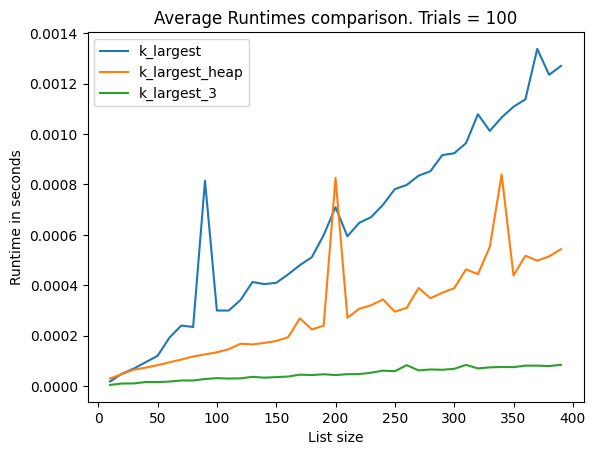

In [19]:
compare_average_k(k_largest,k_largest_heap,k_largest_3)

In the solution to part b, we reduce the number of log(n) operations we perform to k, and in part b we reduce the number of elements which we need to sort to k. The solution for part c should be better because cumalatively it would be better to have these quicker sorting operations. The runtime testing supports this as well as shown above.

### Problem 6

In [20]:
#part a
def majority_element(A):
    d = {}
    largest_key = 0
    largest_val = 0
    for item in A:
        if item not in d:
            d[item] = 1
        else:
            d[item] += 1
        if d[item] > largest_val:
            largest_key = item
            largest_val = d[item]
    return largest_key if largest_val > len(A)//2 else -1

In [33]:
import random
def majority_element_2(A):
    if len(A) == 1:
        return A[0]
    mid = len(A)//2
    right_majority = majority_element_2(A[:mid])
    left_majority = majority_element_2(A[mid:])
    if right_majority != -1:
        count = 0
        for item in A:
            if item == right_majority: count +=1
        if count > len(A)//2: return right_majority
    if left_majority != -1:
        count = 0
        for item in A:
            if item == left_majority: count +=1
        if count > len(A)//2: return left_majority
    return -1

def compare_with_theory(algo,theory, resolution = 1, max_size = 500):
    rng = np.random.default_rng()
    times = []
    for size in range(10,max_size,10):
        time = 0
        for _ in range(0,resolution):
            int_list = rng.integers(0,1000,size)

            start = perf_counter()
            algo(list(int_list))
            end = perf_counter()

            time += (end-start)
        times.append(time/resolution)
    
    x_axis = range(10,max_size,10)
    theo_vals = [theory(i) for i in x_axis]
    fix, ax = plt.subplots(1,2,figsize=(10,4)) # this creates a 1x2 grid of Axes
    ax[0].set_title(f"{str(algo.__name__)} runtimes")
    ax[0].set_xlabel("Array size")
    ax[0].set_ylabel("Runtime in seconds")
    ax[0].plot(x_axis, times)
    ax[1].set_title("Theoretical big-O function:")
    ax[1].set_xlabel(f"Input size n")
    ax[1].plot(x_axis, theo_vals)
    plt.tight_layout()
    plt.show()

def compare_majority():
    letters = ['a','b','c','d']
    time1 = []
    time2 = []
    for i in range (10,500,1):
        l1 = []
        for _ in range(0,i):
            l1.append(random.choice(letters))
        start = perf_counter()
        majority_element(l1)
        end = perf_counter()
        time1.append(end-start)
        start = perf_counter()
        majority_element_2(l1)
        end = perf_counter()
        time2.append(end-start)
    fig, ax = plt.subplots()
    x_axis = range(10,500,1)
    ax.set_title("Runtimes comparison")
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    ax.plot(x_axis,time1,label= 'hash map implementation')
    ax.plot(x_axis,time2,label= 'divide and conquer implementation')
    ax.legend()
    plt.show()

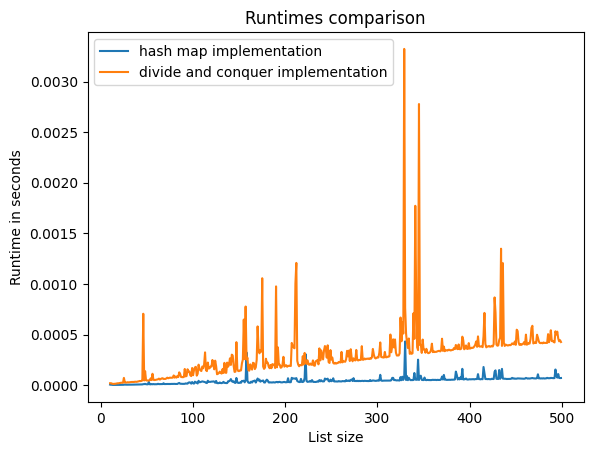

In [34]:
compare_majority()

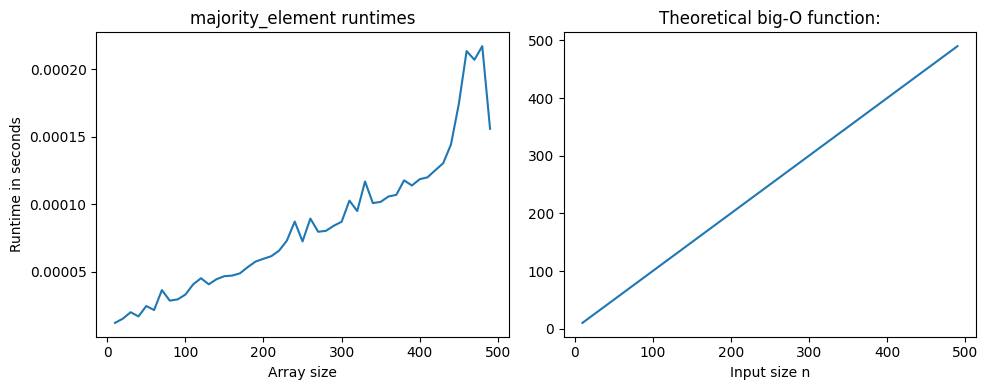

In [23]:
compare_with_theory(majority_element,lambda x: x)

#### part b
As expected the has table implementation has faster runtimes than the divide and conquer. The hash table implementation works in O(n) time because it makes a single iteration through the list and performs hash table functions which are all constant time such as adding and searching the hash table. 

#### part c
The hash table implementation is worse in terms of space complexity, as it requires O(n) space at worst for the hash table. This is because if all elements are different then the hash table will be the size of the input array. The divide and conquer algorithm is in place and does not require extra space outside of what is used for the input array itself, and a couple constant sized variables. This means the space complexity is O(1).